In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)

In [2]:
# negative = pd.read_csv('data/processed/negative/0r4mv5ic_play_distributions.csv').query('type == "comparison"')
# positive = pd.read_csv('data/processed/positive/8m9ake2l_play_distributions.csv').query('type == "comparison"')

negative = pd.read_csv('results/neg_to_plot.csv')
positive = pd.read_csv('results/pos_to_plot.csv')


from ast import literal_eval
def array(x):
    return np.array(literal_eval(x))

positive

,col_game,col_play,round,row_game,row_play,treatment,type
0,"[[[8,8],[2,6],[0,5]],[[6,2],[6,6],[2,5]],[[5,0...","[0.698921568627451,0.1505637254901961,0.150514...",31,"[[[8,8],[2,6],[0,5]],[[6,2],[6,6],[2,5]],[[5,0...","[0.5882738095238096,0.20309523809523808,0.2086...",positive,comparison
1,"[[[8,8],[2,9],[1,0]],[[9,2],[3,3],[1,1]],[[0,1...","[0.56375,0.4362500000000001,0.0]",38,"[[[8,8],[2,9],[1,0]],[[9,2],[3,3],[1,1]],[[0,1...","[0.5095833333333333,0.48375,0.006666666666666666]",positive,comparison
2,"[[[4,4],[4,6],[5,0]],[[6,4],[3,3],[5,1]],[[0,5...","[0.12806372549019607,0.2569607843137255,0.6149...",42,"[[[4,4],[4,6],[5,0]],[[6,4],[3,3],[5,1]],[[0,5...","[0.13220238095238096,0.22851190476190478,0.639...",positive,comparison
3,"[[[4,4],[9,1],[1,3]],[[1,9],[8,8],[1,8]],[[3,1...","[0.21708333333333335,0.5995833333333334,0.1833...",49,"[[[4,4],[9,1],[1,3]],[[1,9],[8,8],[1,8]],[[3,1...","[0.305,0.5554166666666667,0.13958333333333334]",positive,comparison


In [3]:
positive["col_play"].iloc[0]

'[0.698921568627451,0.1505637254901961,0.1505147058823529]'

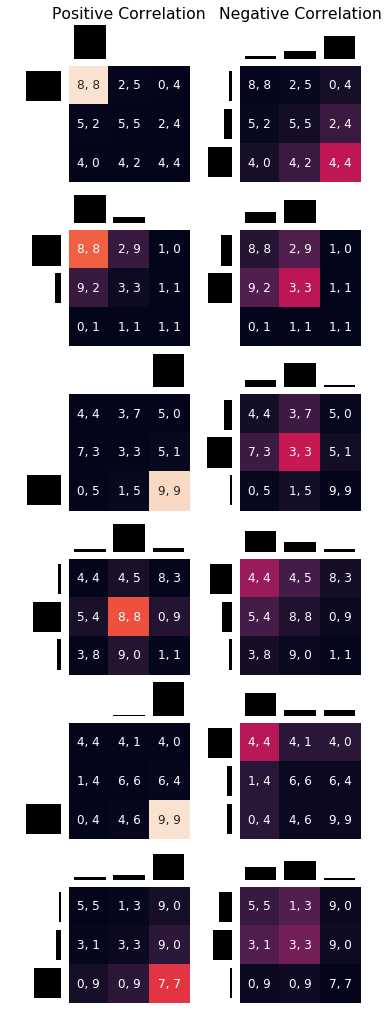

In [20]:
positive_model = pd.read_csv('results/common_comparison_model.csv')
negative_model = pd.read_csv('results/competing_comparison_model.csv')

n_game = 4
size = 3
gs = GridSpec(4 * n_game, 4 * 2, figure=plt.figure(figsize=(size * 2, size * n_game)))

for idx in range(n_game):
    g = array(positive.iloc[idx].row_game)
    for i, name, d in [(0, "Positive", positive_model), (1, "Negative", negative_model)]:
        title = f"{name} Correlation" if idx == 0 else None
        plot_game(title, g, array(d.iloc[idx].play), array(d.iloc[idx].play), idx, i)

plt.savefig('figs/model_comparison_games.pdf', bbox_inches='tight')

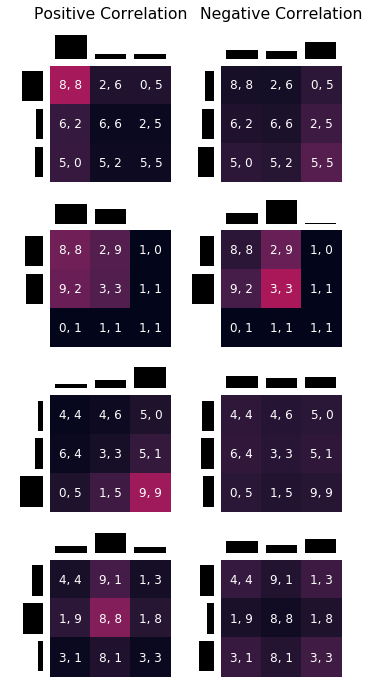

In [4]:
from matplotlib.gridspec import GridSpec

n_game = 4
size = 3
gs = GridSpec(4 * n_game, 4 * 2, figure=plt.figure(figsize=(size * 2, size * n_game)))

def plot_game(title, g, row_play, col_play, top, left):
    top *= 4; left *= 4
    plt.sca(plt.subplot(gs[top+1:top+4, left+1:left+4]))
    row_payoff = g[:, :, 0]
    col_payoff = g[:, :, 1]
    pay = np.array([[f'{row_payoff[i, j]}, {col_payoff[i, j]}' for j in range(3)] for i in range(3)])
    play = row_play[:, None] * col_play
    sns.heatmap(play, vmin=0, vmax=1, annot=pay, fmt='s', annot_kws=dict(size=12), cbar=False)
    plt.xticks([])
    plt.yticks([])

    plt.sca(plt.subplot(gs[top, left+1:left+4]))
    plt.bar(range(3), col_play, color='k')
    # plt.yticks([])
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title(title)

    plt.sca(plt.subplot(gs[top+1:top+4, left]))
    plt.barh(range(3), row_play, color='k')
    # plt.yticks([])
    plt.xlim(0, 1)
    plt.axis('off')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

for idx in range(n_game):
    g = array(positive.iloc[idx].row_game)
    for i, name, d in [(0, "Positive", positive), (1, "Negative", negative)]:
        title = f"{name} Correlation" if idx == 0 else None
        plot_game(title, g, array(d.iloc[idx].row_play), array(d.iloc[idx].col_play), idx, i)
        
plt.savefig('figs/comparison_games.pdf', bbox_inches='tight')

In [21]:
g = array(positive.iloc[1].row_game)
g

array([[[8, 8],
        [2, 9],
        [1, 0]],

       [[9, 2],
        [3, 3],
        [1, 1]],

       [[0, 1],
        [1, 1],
        [1, 1]]])

In [38]:
positive["col_play"].iloc[0]

'[0.7138888888888889,0.11041666666666666,0.17569444444444446]'

In [39]:
pd.read_csv('results/pos_to_plot.csv')


,col_game,col_play,round,row_game,row_play,treatment,type
0,"[[[8,8],[6,2],[5,0]],[[2,6],[6,6],[5,2]],[[0,5...","[0.7138888888888889,0.11041666666666666,0.1756...",31,"[[[8,8],[6,2],[5,0]],[[2,6],[6,6],[5,2]],[[0,5...","[0.6645833333333334,0.19166666666666665,0.1437...",positive,comparison
1,"[[[8,8],[9,2],[0,1]],[[2,9],[3,3],[1,1]],[[1,0...","[0.6090277777777778,0.3909722222222222,0.0]",38,"[[[8,8],[9,2],[0,1]],[[2,9],[3,3],[1,1]],[[1,0...","[0.5270833333333335,0.4618055555555555,0.01111...",positive,comparison
2,"[[[4,4],[6,4],[0,5]],[[4,6],[3,3],[1,5]],[[5,0...","[0.0986111111111111,0.20625000000000002,0.6951...",42,"[[[4,4],[6,4],[0,5]],[[4,6],[3,3],[1,5]],[[5,0...","[0.11874999999999998,0.24196428571428572,0.639...",positive,comparison
3,"[[[4,4],[1,9],[3,1]],[[9,1],[8,8],[8,1]],[[1,3...","[0.21944444444444444,0.5847222222222223,0.1958...",49,"[[[4,4],[1,9],[3,1]],[[9,1],[8,8],[8,1]],[[1,3...","[0.3194444444444444,0.6034722222222222,0.07708...",positive,comparison
